In [ ]:
import pandas as pd
import ast
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv("/content/Final cleaned dataset.csv")

# Convert list-like strings to actual lists
df['Natural Food'] = df['Natural Food'].apply(ast.literal_eval)
df['Yoga'] = df['Yoga'].apply(ast.literal_eval)

# Split comma-separated symptoms into lists
df['Symptom'] = df['Symptom'].apply(lambda x: [s.strip() for s in x.split(',')])

# Encode list-type columns
mlb_symptom = MultiLabelBinarizer()
mlb_food = MultiLabelBinarizer()
mlb_yoga = MultiLabelBinarizer()

symptom_encoded = mlb_symptom.fit_transform(df['Symptom'])
food_encoded = mlb_food.fit_transform(df['Natural Food'])
yoga_encoded = mlb_yoga.fit_transform(df['Yoga'])

# Encode categorical features
df_encoded = pd.concat([
    df[['Age', 'Height_cm', 'Weight_kg', 'BMI']],
    pd.get_dummies(df[['Gender', 'Blood Type', 'Smoking', 'Alcohol Status']], drop_first=True),
    pd.DataFrame(symptom_encoded, columns=mlb_symptom.classes_),
    pd.DataFrame(food_encoded, columns=mlb_food.classes_),
    pd.DataFrame(yoga_encoded, columns=mlb_yoga.classes_)
], axis=1)

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(df['Medical Condition'])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(df_encoded, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

      Cancer       1.00      1.00      1.00      1839
    Diabetes       1.00      1.00      1.00      1867

    accuracy                           1.00      3706
   macro avg       1.00      1.00      1.00      3706
weighted avg       1.00      1.00      1.00      3706



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18530 entries, 0 to 18529
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                18530 non-null  int64  
 1   Gender             18530 non-null  object 
 2   Blood Type         18530 non-null  object 
 3   Medical Condition  18530 non-null  object 
 4   Test Results       18530 non-null  object 
 5   Height_cm          18530 non-null  int64  
 6   Weight_kg          18530 non-null  int64  
 7   BMI                18530 non-null  float64
 8   Smoking            18530 non-null  object 
 9   Natural Food       18530 non-null  object 
 10  Yoga               18530 non-null  object 
 11  Symptom            18530 non-null  object 
 12  Alcohol Status     18530 non-null  object 
dtypes: float64(1), int64(3), object(9)
memory usage: 1.8+ MB
None
                Age     Height_cm     Weight_kg           BMI
count  18530.000000  18530.000000  18530.0

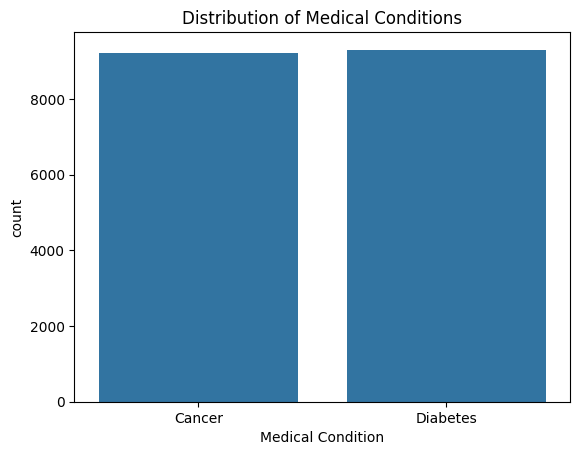

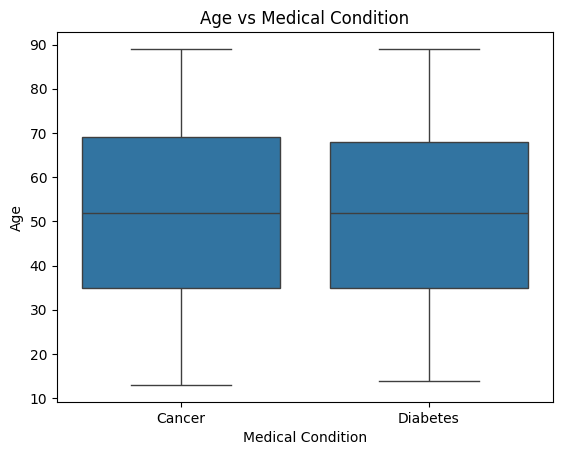

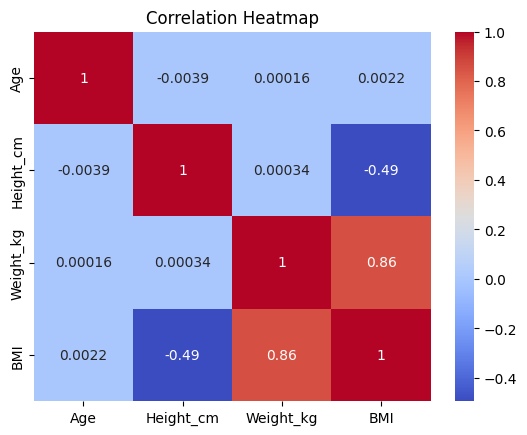

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/Final cleaned dataset.csv")

# Basic info
print(df.info())
print(df.describe())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Distribution of target variable
sns.countplot(data=df, x='Medical Condition')
plt.title("Distribution of Medical Conditions")
plt.show()

# Age distribution by condition
sns.boxplot(data=df, x='Medical Condition', y='Age')
plt.title("Age vs Medical Condition")
plt.show()

# Correlation heatmap for numeric features
numeric_cols = ['Age', 'Height_cm', 'Weight_kg', 'BMI']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

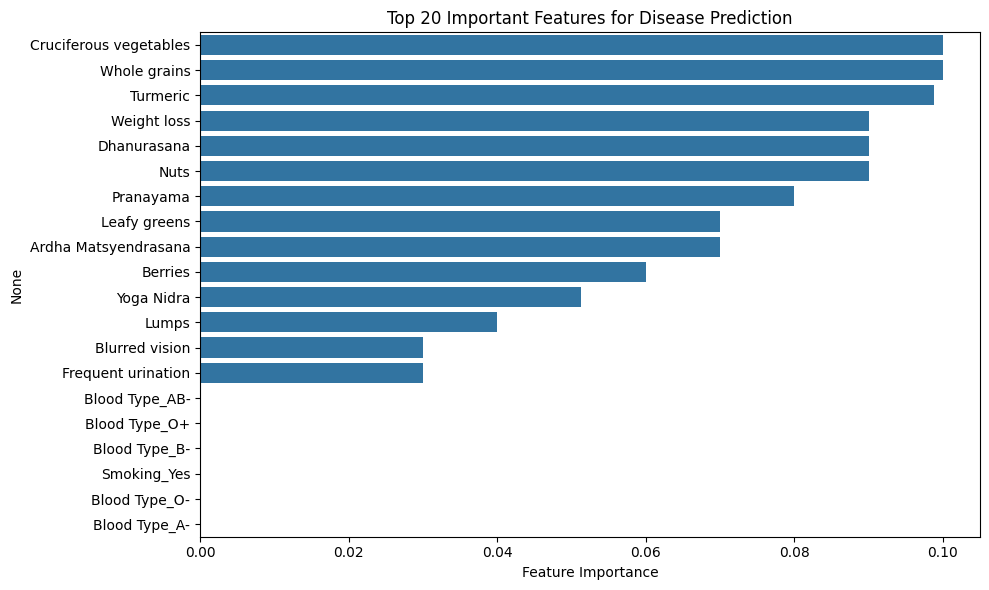

In [ ]:
import pandas as pd
import ast
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer

# Load dataset
df = pd.read_csv("/content/Final cleaned dataset.csv")

# Convert list-like fields
df['Natural Food'] = df['Natural Food'].apply(ast.literal_eval)
df['Yoga'] = df['Yoga'].apply(ast.literal_eval)
df['Symptom'] = df['Symptom'].apply(lambda x: [s.strip() for s in x.split(',')])

# Encode lists
mlb_symptom = MultiLabelBinarizer()
mlb_food = MultiLabelBinarizer()
mlb_yoga = MultiLabelBinarizer()

symptom_encoded = mlb_symptom.fit_transform(df['Symptom'])
food_encoded = mlb_food.fit_transform(df['Natural Food'])
yoga_encoded = mlb_yoga.fit_transform(df['Yoga'])

# Prepare final feature set
df_features = pd.concat([
    df[['Age', 'Height_cm', 'Weight_kg', 'BMI']],
    pd.get_dummies(df[['Gender', 'Blood Type', 'Smoking', 'Alcohol Status']], drop_first=True),
    pd.DataFrame(symptom_encoded, columns=mlb_symptom.classes_),
    pd.DataFrame(food_encoded, columns=mlb_food.classes_),
    pd.DataFrame(yoga_encoded, columns=mlb_yoga.classes_)
], axis=1)

# Encode target
le = LabelEncoder()
y = le.fit_transform(df['Medical Condition'])

# Train Random Forest for feature importance
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(df_features, y)

# Feature importance plot
importances = pd.Series(model.feature_importances_, index=df_features.columns)
top_features = importances.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 20 Important Features for Disease Prediction")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()